# Regression, Part 2

In this notebook we continue our exploration of regression. We introduce using [folds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) as well as more complex regression models where we basically come up with different measures of optimal, as we discussed in the previous notebook.

In [2]:
import DS

## Validation using kfold and cross-validation on two regression datasets

Here is the code we are going to use here.

```Python
def runBestRegressionModelKFold(dataSets=[],regModels=[],names=[]):

    myResults={}
    for ds in dataSets:
        myData,myTrain,myVal=dataEncoding(ds,taskID='filesReg')
        for name in myTrain.columns:
          if (not(myTrain[name].dtype=='O')):
            myTrain[name]=pre.minmax_scale(myTrain[name].astype('float')) 
        #myTrain = skb(f_regression, k=3).fit_transform(myTrain,myVal)
        splits =kf(n_splits=10, shuffle=True, random_state=42)
        infinity = float("inf")
        index=-1 
        count =-1
        for reg in regModels:
            count = count +1
            reg.fit(myTrain, myVal)
            cvsScores=cvs(reg, myTrain, myVal,cv=splits,scoring='neg_mean_squared_error')
            meanSquareRootError=np.sqrt(-1*cvsScores.mean())
            print(regsNames[names[count]],meanSquareRootError)
            if (meanSquareRootError < infinity):
                infinity = meanSquareRootError
                index = count
                L1,L2,L3,L4,L5,L6= regsNames[names[index]],reg.intercept_,reg.coef_, np.exp(reg.coef_), cvsScores, infinity
        print(filesReg[ds],regsNames[names[index]],infinity)
        myResults[filesReg[ds]]={1:L1,2:L2,3:L3,4:L4,5:L5,6:L6}
        print('\n')     
    return myResults    
```

### What does the code do?

This function runs a complete work flow. We pass in a list of data sets (`dataSets`) and regression models. We run **nested** for loops.

* For **each** data set we will compute **each** regression model.

Each time we read in a data set we

1. transform the data with the `minmax_scale`
1. Split the data into 10 folds

For each regression model we

1. Use cross validation with our splits (k-folds)
1. Compute the mean error across all of our folds.

#### These are the scikit-learn functions/methods we use

* [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html): "Split dataset into k consecutive folds (without shuffling by default)"
* [minmax_scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html): "Transforms features by scaling each feature to a given range"
* [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html): 
* [\*.fit](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit): Fit the model.

### What does the function return?

The function returns a dictionary (keyed by data name) with values of dictionaries (keyed by integers 1-6)

DS.runBestRegressionModelKFold:[a relative link](DS.py)

In [4]:
my_results = DS.runBestRegressionModelKFold([0,1],[DS.Regs[0]],[0])

LinearRegression 54.9877879922
diabetes LinearRegression 54.9877879922


LinearRegression 3.26493752482
parkinsons LinearRegression 3.26493752482




In [7]:
my_results

{'diabetes': {1: 'LinearRegression',
  2: -2.0761196515562972,
  3: array([  -2.18167345,  -22.85964809,  135.59168262,   79.29336753,
         -222.35925215,  149.88725147,   28.64436306,   46.32486843,
          195.10157471,   18.4877213 ]),
  4: array([  1.12852519e-01,   1.18081259e-10,   7.70405821e+58,
           2.73320350e+34,   2.69527940e-97,   1.24510570e+65,
           2.75479201e+12,   1.31411911e+20,   5.38936141e+84,
           1.06933884e+08]),
  5: array([-2743.91123776, -2979.19128064, -2427.07375419, -2943.53472742,
         -3649.95462856, -2941.17849061, -2408.5223554 , -3170.73664908,
         -3485.68036143, -3486.78479771]),
  6: 54.987787992237692},
 'parkinsons': {1: 'LinearRegression',
  2: 9.856898784862377,
  3: array([  3.32407981e+00,  -1.37440629e+00,   5.57894794e-01,
          -3.06185410e+01,   6.89111466e+00,   3.76175496e+02,
           3.98898308e+00,  -3.53357341e+02,  -7.80868096e+00,
          -1.39471115e+00,  -2.19009877e+03,   1.47102248e+01

In [6]:
for key1 in my_results.keys():
    for key2 in my_results[key1].keys():
        print((key1,key2), my_results[key1][key2])

('diabetes', 1) LinearRegression
('diabetes', 2) -2.07611965156
('diabetes', 3) [  -2.18167345  -22.85964809  135.59168262   79.29336753 -222.35925215
  149.88725147   28.64436306   46.32486843  195.10157471   18.4877213 ]
('diabetes', 4) [  1.12852519e-01   1.18081259e-10   7.70405821e+58   2.73320350e+34
   2.69527940e-97   1.24510570e+65   2.75479201e+12   1.31411911e+20
   5.38936141e+84   1.06933884e+08]
('diabetes', 5) [-2743.91123776 -2979.19128064 -2427.07375419 -2943.53472742 -3649.95462856
 -2941.17849061 -2408.5223554  -3170.73664908 -3485.68036143 -3486.78479771]
('diabetes', 6) 54.9877879922
('parkinsons', 1) LinearRegression
('parkinsons', 2) 9.85689878486
('parkinsons', 3) [  3.32407981e+00  -1.37440629e+00   5.57894794e-01  -3.06185410e+01
   6.89111466e+00   3.76175496e+02   3.98898308e+00  -3.53357341e+02
  -7.80868096e+00  -1.39471115e+00  -2.19009877e+03   1.47102248e+01
  -9.84354620e+00   2.18740147e+03  -1.90117432e+00  -3.81456728e+00
   2.66469805e+00  -9.21614

## [Feature selection](https://en.wikipedia.org/wiki/Feature_selection)

### What are the best predictors (independent variables) to use in our model? 

This is one of the key questions in machine learning. We might rely on domain experts to tell us what variables to use. But as the number of variables increase it is unlikely that experts will understand the relative value of all of them. In our diabetes data set, presumably all the variables that were put in the data were acquired because an expert felt they would be valuable. Yet when we created our model we found that some variables did not play well together

```
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
```

DS.runBestRegressionModelKFoldwFS:[a relative link](DS.py)

### Questions

1. **Suitable number of features:** What is the best of number features to use in our model
1. What is the relationship between feature selection and statistical hypothesis testing?

In [8]:
DS.runBestRegressionModelKFoldwFS([0,1],[DS.Regs[0]],[0])

LinearRegression 55.8311838339
diabetes LinearRegression 55.8311838339


LinearRegression 3.35850984206
parkinsons LinearRegression 3.35850984206




{'diabetes': {1: 'LinearRegression',
  2: -250.95406053073677,
  3: array([  6.04202222,   0.92475415,  -1.00602696,  -5.07395034,  48.89461151]),
  4: array([  4.20743012e+02,   2.52124833e+00,   3.65668915e-01,
           6.25765142e-03,   1.71656390e+21]),
  5: array([-2588.16642204, -3228.12897079, -2419.44175056, -3395.63182348,
         -3532.32690081, -3354.04018219, -2507.14250101, -3206.19359587,
         -3454.05600251, -3486.08273369]),
  6: 55.83118383389786},
 'parkinsons': {1: 'LinearRegression',
  2: -3.3605702161113591,
  3: array([  6.63606374e-02,  -1.70012537e-03,   5.14678908e+00,
          -3.46218507e+00,   1.22506597e+00]),
  4: array([  1.06861203e+00,   9.98301319e-01,   1.71878714e+02,
           3.13611609e-02,   3.40439066e+00]),
  5: array([ -9.93573537, -11.21597172, -12.18567326, -10.90814118,
         -11.40931396, -11.56303156, -10.6267876 , -10.86767993,
         -11.97347384, -12.11007516]),
  6: 3.3585098420620962}}

**Validation using kfold and check the error per fold using diabetes dataset. **

DS.runBestRegressionModelKFoldPrintFolderErrors:[a relative link](DS.py)

In [ ]:
def runBestRegressionModelKFoldPrintFolderErrors(dataSets=[],regModels=[],names=[]):

    myResults={}
    for ds in dataSets:
        myData,myTrain,myVal=dataEncoding(ds,taskID='filesReg')
        splits =kf(n_splits=2, shuffle=True, random_state=42)
        infinity = float("inf")
        index=-1 
        count =-1
        for reg in regModels:
            count = count+1
            xval_err = 0
            for train,test in splits.split(myTrain):
                reg.fit(myTrain.ix[train],myVal.ix[train])
                p = reg.predict(myTrain.ix[test])
                e = p-myVal.ix[test]
                print (e)
                xval_err += np.dot(e,e)
            rmse_10cv = np.sqrt(xval_err/len(myTrain))
            print(rmse_10cv)
            input("Press any key")
            if (rmse_10cv < infinity):
                infinity = rmse_10cv
                index = count
                L1,L2,L3,L4,L5= regsNames[names[index]],reg.intercept_,reg.coef_, np.exp(reg.coef_), infinity
        print(filesReg[ds],regsNames[names[index]],infinity)
        myResults[filesReg[ds]]={1:L1,2:L2,3:L3,4:L4,5:L5}
        print('\n')     
    return myResults


In [4]:
DS.runBestRegressionModelKFoldPrintFolderErrors([0],[DS.Regs[0]],[0])

0       51.874387
2       29.784233
3      -41.222417
5       11.551659
6      -64.877094
7       62.287577
9     -102.725416
10      -8.712643
11      37.359077
15      11.974796
16      51.257121
17      31.635977
18      48.895830
19     -46.179513
22      56.096208
24      -8.372552
25     -61.484976
26     -42.406517
29    -111.339785
30      39.846025
31       2.840608
33      27.601882
36     -60.660853
38      -3.669952
39      37.691338
42      81.416677
45      66.745646
46     -50.322612
55     -44.334540
56     153.080229
          ...    
395    -88.663330
397    -31.115494
398    -80.988272
399    -50.909816
400     34.980971
401     -8.702057
402    -34.669844
407     44.441914
408      2.316037
409     -4.807604
410    -65.769389
411     20.188607
412    -17.401838
414     24.234676
415     -2.231255
416    -10.050522
417    107.216933
418     19.778457
419     38.263006
421    -25.312113
422    -21.907016
423     58.233883
427     66.572686
429     10.452257
432     44

{'diabetes': {1: 'LinearRegression',
  2: -282.87694402138419,
  3: array([  0.20030102, -23.10866247,   4.40112721,   0.95599474,
          -0.76310553,   0.48291796,  -0.46846236,   0.43246722,
          73.10107625,   0.25937708]),
  4: array([  1.22177048e+00,   9.20524615e-11,   8.15427324e+01,
           2.60125686e+00,   4.66216327e-01,   1.62079693e+00,
           6.25964035e-01,   1.54105496e+00,   5.58977124e+31,
           1.29612245e+00]),
  5: 55.114902399662412}}

## [Ridge Regression](https://en.wikipedia.org/wiki/Tikhonov_regularization)

Width [Ridge regression](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression) we take our standard mean square error (MSE) and add a [regularization](https://goo.gl/AbyCf7) term. According to Wikipedia

>Regularization, in mathematics and statistics and particularly in the fields of machine learning and inverse problems, is a process of introducing additional information in order to solve an ill-posed problem or to prevent overfitting.

In Ridge regression our normalization terms is the $L^2$ norm of our coefficients scaled by the [hyperparameter](https://goo.gl/4nuUSF) $\alpha$.

\begin{equation}
J(\Theta) = \text{MSE}(\Theta) + \alpha\frac{1}{2} \sum_{i=1}^n\Theta_i^2
\end{equation}


With hyperparameters, we fix these value when we are optimizing for our $\Theta_i$ values. We can optimize $\alpha$ with a separate cross-validation experiment (keeping $\Theta_i$'s fixed) prior to our cross-validation experiment to optimize $\Theta_i$.

The regression task is now to find the linear function that **minimizes** $J(\Theta)$---that is, minimizing both the mean square error and the regularization term.

### What do you imagine the effect of the regularization term would be?

### Ridge Regression with scikit-learn

In [10]:
from sklearn import linear_model
help(linear_model.Ridge)

Help on class Ridge in module sklearn.linear_model.ridge:

class Ridge(_BaseRidge, sklearn.base.RegressorMixin)
 |  Linear least squares with l2 regularization.
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape [n_samples, n_targets]).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, array-like}, shape (n_targets)
 |      Regularization strength; must be a positive float. Regularization
 |      improves the conditioning of the problem and reduces the variance of
 |      the estimates. Larger values specify stronger regularization.
 |      Alpha corresponds to ``C^-1`` in other linear models such as 
 |      LogisticRegression or LinearSVC. If a

### How does our choice of $\alpha$ effect our results?

#### Plot different aplhas and show the values of MSE using diabetes

DS.runRidgeRegressiontoEstAlpha:[a relative link](DS.py)

Ridge Regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 53.4761		 54.9810
0.418	 53.4775		 54.9782
0.826	 53.4812		 54.9786
1.234	 53.4868		 54.9815
1.642	 53.4939		 54.9864
2.050	 53.5022		 54.9929
2.458	 53.5116		 55.0007
2.866	 53.5217		 55.0096
3.274	 53.5325		 55.0193
3.682	 53.5439		 55.0296
4.090	 53.5556		 55.0404
4.498	 53.5676		 55.0516
4.906	 53.5798		 55.0630
5.313	 53.5922		 55.0747
5.721	 53.6046		 55.0864
6.129	 53.6172		 55.0982
6.537	 53.6297		 55.1101
6.945	 53.6422		 55.1219
7.353	 53.6547		 55.1336
7.761	 53.6670		 55.1453
8.169	 53.6793		 55.1569
8.577	 53.6915		 55.1683
8.985	 53.7036		 55.1797
9.393	 53.7155		 55.1909
9.801	 53.7273		 55.2019
10.209	 53.7390		 55.2128
10.617	 53.7505		 55.2236
11.025	 53.7619		 55.2341
11.433	 53.7731		 55.2445
11.841	 53.7842		 55.2548
12.249	 53.7951		 55.2649
12.657	 53.8058		 55.2748
13.065	 53.8164		 55.2846
13.473	 53.8268		 55.2941
13.881	 53.8371		 55.3036
14.289	 53.8472		 55.3129
14.697	 53.8572		 55.3220
15.104	 53.8670	

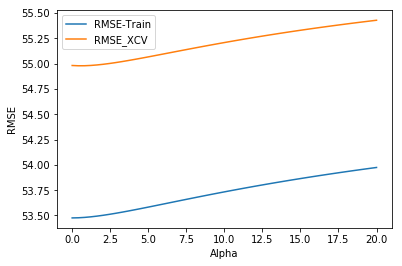

In [5]:
import DS
DS.runRidgeRegressiontoEstAlpha([0])

**Validation using kfold and cross-validation for alpha and the data using diabetes dataset**

DS.runBestRegressionModelKFold:[a relative link](DS.py)

def runRidgeRegressiontoEstAlpha(dataSets=[]):

    from sklearn.linear_model import Ridge
    
    
    print('Ridge Regression')
    print('alpha\t RMSE_train\t RMSE_10cv\n')
    alpha = np.linspace(.01,20,50)

    
    for ds in dataSets:
        myData,myTrain,myVal=dataEncoding(ds,taskID='filesReg')
        #for name in myTrain.columns:
          #if (not(myTrain[name].dtype=='O')):
            #myTrain[name]=pre.minmax_scale(myTrain[name].astype('float')) 
        t_rmse = np.array([])
        cv_rmse = np.array([])
        
        for a in alpha:
            ridge = Ridge(fit_intercept=True, alpha=a)
            ridge.fit(myTrain,myVal)
            p = ridge.predict(myTrain)
            err = p-myVal
            total_error = np.dot(err,err)
            rmse_train = np.sqrt(total_error/len(p))
    
            splits =kf(n_splits=10, shuffle=True, random_state=42)
            xval_err = 0
            for train,test in splits.split(myTrain):
                ridge.fit(myTrain.ix[train],myVal.ix[train])
                p = ridge.predict(myTrain.ix[test])
                e = p-myVal.ix[test]
                xval_err += np.dot(e,e)
            rmse_10cv = np.sqrt(xval_err/len(myTrain))     
    
            t_rmse = np.append(t_rmse, [rmse_train])
            cv_rmse = np.append(cv_rmse, [rmse_10cv])
            print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))
        input("Press Any Key")
        
    plt.plot(alpha, t_rmse, label='RMSE-Train')
    plt.plot(alpha, cv_rmse, label='RMSE_CV')
    plt.legend( ('RMSE-Train', 'RMSE_XCV') )
    plt.ylabel('RMSE')
    plt.xlabel('Alpha')
    plt.show()


In [6]:
DS.runBestRegressionModelKFold([0],[DS.Regs[1]],[1])

RidgeCV 55.0821369773
diabetes RidgeCV 55.0821369773




{'diabetes': {1: 'RidgeCV',
  2: 42.149985571753987,
  3: array([ -1.22670339e-01,  -2.20769374e+01,   1.30079387e+02,
           7.67756543e+01,  -3.31633307e+01,  -1.55024577e+01,
          -5.11710043e+01,   3.12611041e+01,   1.21081338e+02,
           2.23936136e+01]),
  4: array([  8.84555218e-01,   2.58290183e-10,   3.10999787e+56,
           2.20415951e+33,   3.95683972e-15,   1.85083701e-07,
           5.98019288e-23,   3.77159480e+13,   3.84553602e+52,
           5.31401555e+09]),
  5: array([-2760.46336984, -2953.66350592, -2466.89467959, -2996.86314214,
         -3571.9536877 , -3027.32368837, -2396.92247752, -3255.52262074,
         -3379.76346036, -3531.04750765]),
  6: 55.082136977258955}}

## Non-linearity and Ridge Regression

### Motivation:

Adding Nonlinearing or noise to the data increases the variability by which the linear regression effectiveness gets worse and we need regularization through ridge regression.


**Validation using kfold and cross-validation for alpha and the data using synthesis dataset adding non-linearity**

DS.bestRegressionSynthesisRidge:[a relative link](DS.py)


Code:

def bestRegressionSynthesis(Regs=[],names=[]): 
    
    np.random.seed(42)
    m = 100
    X =  pre.scale(100* np.random.rand(m, 1) - 3)
    y =  0.5 * X**2 + X + 2 + np.random.randn(m, 1)
    
    X_train, X_val, y_train, y_val = tts(X, y, test_size=0.2, random_state=42)
    
    infinity = float("inf")
    index=-1
    count =-1
    
    for reg in Regs:
        count = count +1
        reg.fit(X_train, y_train.ravel())
        pred=reg.predict(X_val)
        meanSquareRootError=np.sqrt(mse(pred,y_val.ravel()))
        print(regsNames[names[count]],meanSquareRootError)
        if (meanSquareRootError < infinity):
            infinity = meanSquareRootError
            index = count
            L1,L2,L3,L4,L5= reg.intercept_,reg.coef_,pred, np.exp(reg.coef_), meanSquareRootError
    return regsNames[names[index]],L1,L2,L3,L4,L5


In [7]:
DS.bestRegressionSynthesis([DS.Regs[0],DS.Regs[1]],[0,1])

LinearRegression 0.957258936664
RidgeCV 0.952268271599


('RidgeCV',
 2.4379271130332341,
 array([ 0.83353404]),
 array([ 1.29287429,  3.63373631,  3.2885425 ,  2.97956286,  1.8426204 ,
         2.35336725,  1.93657565,  3.54440141,  1.17185947,  2.16860213,
         2.33025492,  2.82474585,  3.41024106,  3.78596472,  1.45067195,
         1.55324341,  3.28579852,  1.32240382,  3.45806033,  1.594091  ]),
 array([ 2.30143775]),
 0.95226827159859306)

## [Lasso Regression](https://goo.gl/qZTDGP)

### [Least Absolute and Selection Operator Regression (LASSO)](http://scikit-learn.org/stable/modules/linear_model.html#lasso)

LASSO combines regularization with feature selection.

The cost-function for LASSO is provided below

\begin{equation}
J(\Theta) = \text{MSE}(\Theta) + \alpha \sum_{i=1}^n |\Theta_i|
\end{equation}

### How does this cost function differ from the cost function for Ridge Regression?

* Again, $\alpha$ is a hyperparameter. 
* Again, we need to cross-validation to estimate $\alpha$ and another one to report the model performance as described above.


### LASSO with Scikit-Learn

In [12]:
help(linear_model.Lasso)

Help on class Lasso in module sklearn.linear_model.coordinate_descent:

class Lasso(ElasticNet)
 |  Linear Model trained with L1 prior as regularizer (aka the Lasso)
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Technically the Lasso model is optimizing the same objective function as
 |  the Elastic Net with ``l1_ratio=1.0`` (no L2 penalty).
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, optional
 |      Constant that multiplies the L1 term. Defaults to 1.0.
 |      ``alpha = 0`` is equivalent to an ordinary least square, solved
 |      by the :class:`LinearRegression` object. For numerical
 |      reasons, using ``alpha = 0`` with the ``Lasso`` object is not advised.
 |      Given this, you should use the :class:`LinearRegression` object.
 |  
 |  fit_intercept : boolean
 |      whether to calculate the intercept for this model. If set
 |     

## [Elastic Net](https://en.wikipedia.org/wiki/Elastic_net_regularization)


[Elastic net](http://scikit-learn.org/stable/modules/linear_model.html#elastic-net) is a middle ground between Ridge and LASSO. The cost function for Elastic Net is

\begin{equation}
J(\Theta) = \text{MSE}(\Theta) + r\alpha \sum_{i=1}^n |\Theta_i| + (1-r)\frac{\alpha}{2} \sum_{i=1}^n |\Theta_i|^2
\end{equation}

#### The regularization is the weighted average of the Ridge and LASSO regularization (notice the $r$ and $(1-r)$ terms

* $\alpha$ and $r$ are hyperparamters
* Again, we need one cross-validation to estimate $\alpha$ and $r$ and another cross-validation to optimize the $\Theta_i$'s

### Elastic Net with Scikit-Learn

In [13]:
help(linear_model.ElasticNet)

Help on class ElasticNet in module sklearn.linear_model.coordinate_descent:

class ElasticNet(sklearn.linear_model.base.LinearModel, sklearn.base.RegressorMixin)
 |  Linear regression with combined L1 and L2 priors as regularizer.
 |  
 |  Minimizes the objective function::
 |  
 |          1 / (2 * n_samples) * ||y - Xw||^2_2
 |          + alpha * l1_ratio * ||w||_1
 |          + 0.5 * alpha * (1 - l1_ratio) * ||w||^2_2
 |  
 |  If you are interested in controlling the L1 and L2 penalty
 |  separately, keep in mind that this is equivalent to::
 |  
 |          a * L1 + b * L2
 |  
 |  where::
 |  
 |          alpha = a + b and l1_ratio = a / (a + b)
 |  
 |  The parameter l1_ratio corresponds to alpha in the glmnet R package while
 |  alpha corresponds to the lambda parameter in glmnet. Specifically, l1_ratio
 |  = 1 is the lasso penalty. Currently, l1_ratio <= 0.01 is not reliable,
 |  unless you supply your own sequence of alpha.
 |  
 |  Read more in the :ref:`User Guide <elastic_n

# Comparisons

** Which have better results ridge, Lasso, ElasticNet? Why? **

## Exercise

### Questions

1. Use the functions in the DS.py to build models using Lasso and Elastic Net using both regression datasets.
2. Compare the results (mainly MSE) with other regression models.
3. Give some interpretations for your results.
 